In [ ]:
#######################################################################################NOTE#######################################################################################
# if running on shared drive please uncomment the two lines
#######################################################################################NOTE#######################################################################################
# from google.colab import drive
# drive.mount('/content/drive')

import numpy as np
import pandas as pd

from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

#import keras
import tensorflow as tf

from tensorflow.keras.preprocessing import sequence

from keras.utils.np_utils import to_categorical

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import SimpleRNN, Embedding, LSTM, Dense, Dropout

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# import matplotlib
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# last_30_features = np.asanyarray(pd.read_csv('/content/drive/Shared drives/CS 584/notebooks/last_n_datasets/last_30_features.csv', index_col=0))
last_30_features = np.asanyarray(pd.read_csv('last_n_datasets/last_30_features.csv', index_col=0))
# last_30_results = np.asanyarray(pd.read_csv('/content/drive/Shareddrives/CS 584/notebooks/last_n_datasets/last_30_results.csv', index_col=0)['0'])
last_30_results = np.asanyarray(pd.read_csv('last_n_datasets/last_30_results.csv', index_col=0)['0'])

In [ ]:
scaler = MinMaxScaler()
last_30_features = scaler.fit_transform(last_30_features)
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(last_30_features, last_30_results, test_size = 0.2)

In [ ]:
# Convert to Tensors
X_train, X_test = tf.convert_to_tensor(X_train_30), tf.convert_to_tensor(X_test_30)
y_train = to_categorical(y_train_30, num_classes = 12)
y_test = to_categorical(y_test_30, num_classes = 12)
y_train, y_test = tf.convert_to_tensor(y_train).astype('float32'), tf.convert_to_tensor(y_test).astype('float32')
#y_train, y_test = y_train, y_testb
print('X_train.shape = ', X_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_train.shape = ', y_train.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (18619, 12)
X_test.shape =  (4655, 12)
y_train.shape =  (18619, 12)
y_test.shape =  (4655, 12)


In [ ]:
model = Sequential()
model.add(SimpleRNN(units=12, input_shape=(X_train.shape[1], 1),return_sequences = True, unroll = True, activation = 'relu'))
model.add(SimpleRNN(units=12, input_shape=(X_train.shape[1], 1),return_sequences = True, unroll = True, activation = 'relu'))
model.add(SimpleRNN(units=12, input_shape=(X_train.shape[1], 1),return_sequences = True, unroll = True, activation = 'relu'))
model.add(SimpleRNN(units=12, input_shape=(X_train.shape[1], 1),return_sequences = True, unroll = True, activation = 'relu'))
model.add(SimpleRNN(units=12, input_shape=(X_train.shape[1], 1),return_sequences = True, unroll = True, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])

In [ ]:
batch_size = 64
num_epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_split = 0.2)

Epoch 1/10
233/233 [==============================] - 10s 24ms/step - loss: 0.7851 - accuracy: 0.9031 - val_loss: 0.6776 - val_accuracy: 0.9314
Epoch 2/10
233/233 [==============================] - 5s 21ms/step - loss: 0.6763 - accuracy: 0.9316 - val_loss: 0.6758 - val_accuracy: 0.9314
Epoch 3/10
233/233 [==============================] - 5s 20ms/step - loss: 0.6762 - accuracy: 0.9315 - val_loss: 0.6779 - val_accuracy: 0.9314
Epoch 4/10
233/233 [==============================] - 5s 20ms/step - loss: 0.6759 - accuracy: 0.9302 - val_loss: 0.6767 - val_accuracy: 0.9314
Epoch 5/10
233/233 [==============================] - 5s 20ms/step - loss: 0.6757 - accuracy: 0.9307 - val_loss: 0.6757 - val_accuracy: 0.9314
Epoch 6/10
233/233 [==============================] - 5s 20ms/step - loss: 0.6758 - accuracy: 0.9228 - val_loss: 0.6750 - val_accuracy: 0.9166
Epoch 7/10
233/233 [==============================] - 5s 20ms/step - loss: 0.6747 - accuracy: 0.9289 - val_loss: 0.6755 - val_accuracy: 0.931

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 12, 12)            168       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 12, 12)            300       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 12, 12)            300       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 12, 12)            300       
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 12, 12)            300       
                                                                 
 dense (Dense)               (None, 12, 1)             13        
                                                                 
Total params: 1,381
Trainable params: 1,381
Non-trainabl

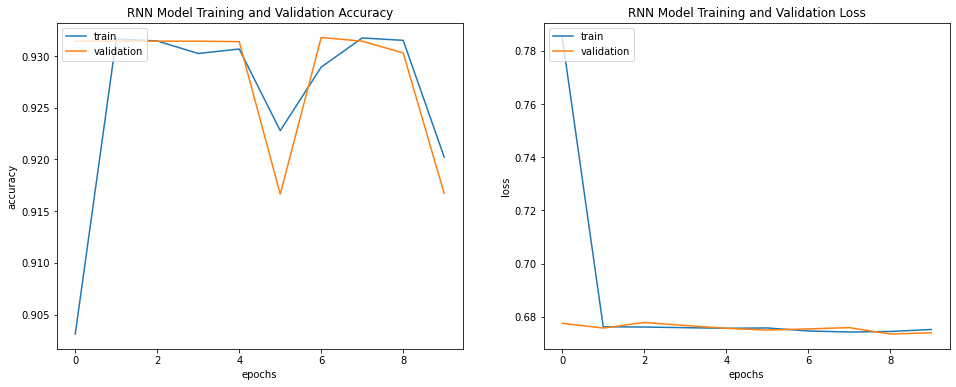

In [ ]:
# now we print the graphs
figure, axs = plt.subplots(1, 2)
figure.set_size_inches(16, 6)

axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('RNN Model Training and Validation Accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epochs')
axs[0].legend(['train', 'validation'], loc='upper left')

axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('RNN Model Training and Validation Loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epochs')
axs[1].legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=64, verbose=0)
print('test loss = ', score[0])
print('test accuracy = ', score[1])

test loss =  0.6735830903053284
test accuracy =  0.9165595173835754
